# Decision tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
dataset=pd.read_csv('WineQT.csv')

In [3]:
# prompt: get unique value present in dataset

print(dataset.nunique())

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64


In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
len(dataset)


1143

In [6]:

dataset.shape

(1143, 13)

In [7]:
dataset['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [8]:
set(dataset['quality'])

{3, 4, 5, 6, 7, 8}

# Exploratory Data Aanlysis

In [9]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


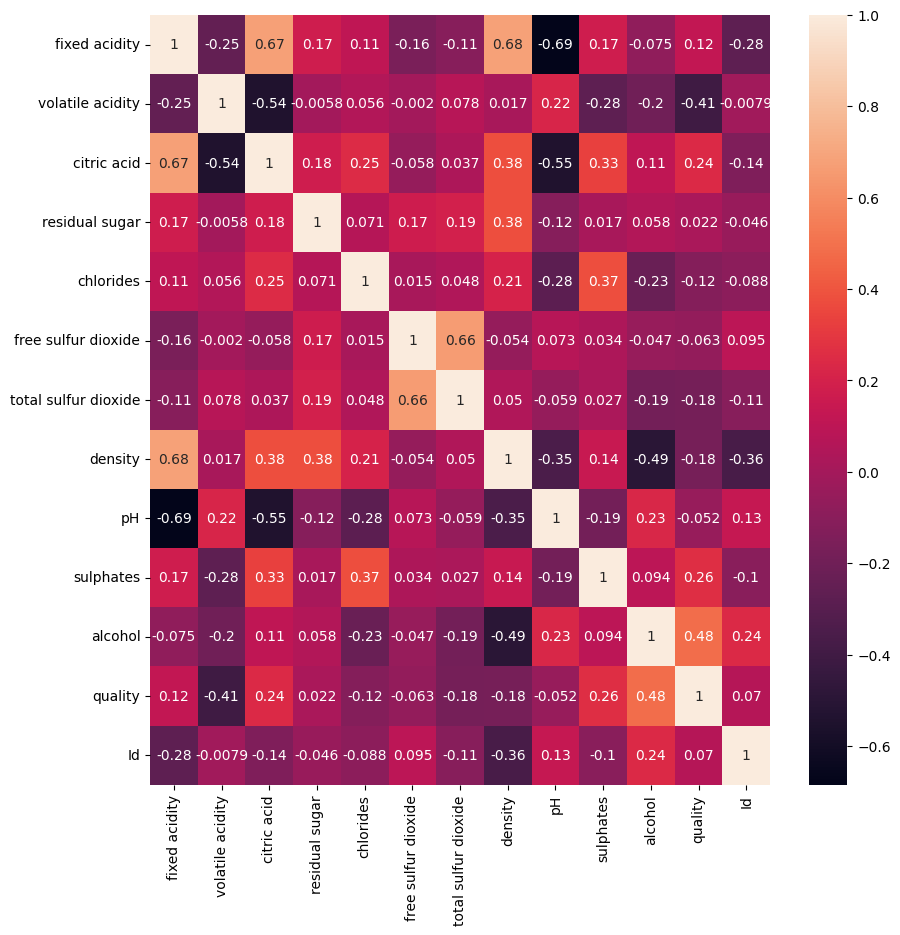

In [10]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(dataset.corr(),annot=True)
plt.savefig('heatmapDT.jpg')
plt.show()

In [11]:
dataset.describe()#all descriptive analysis
#count-number of !null values
#50%-median
#75%-third quartile (Q3)
#std(mean=0,std deviation=1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


/tmp/ipython-input-12-3015224294.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], kde=True, bins=30)
/tmp/ipython-input-12-3015224294.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], kde=True, bins=30)
/tmp/ipython-input-12-3015224294.py:8: UserWarning: 

`distp

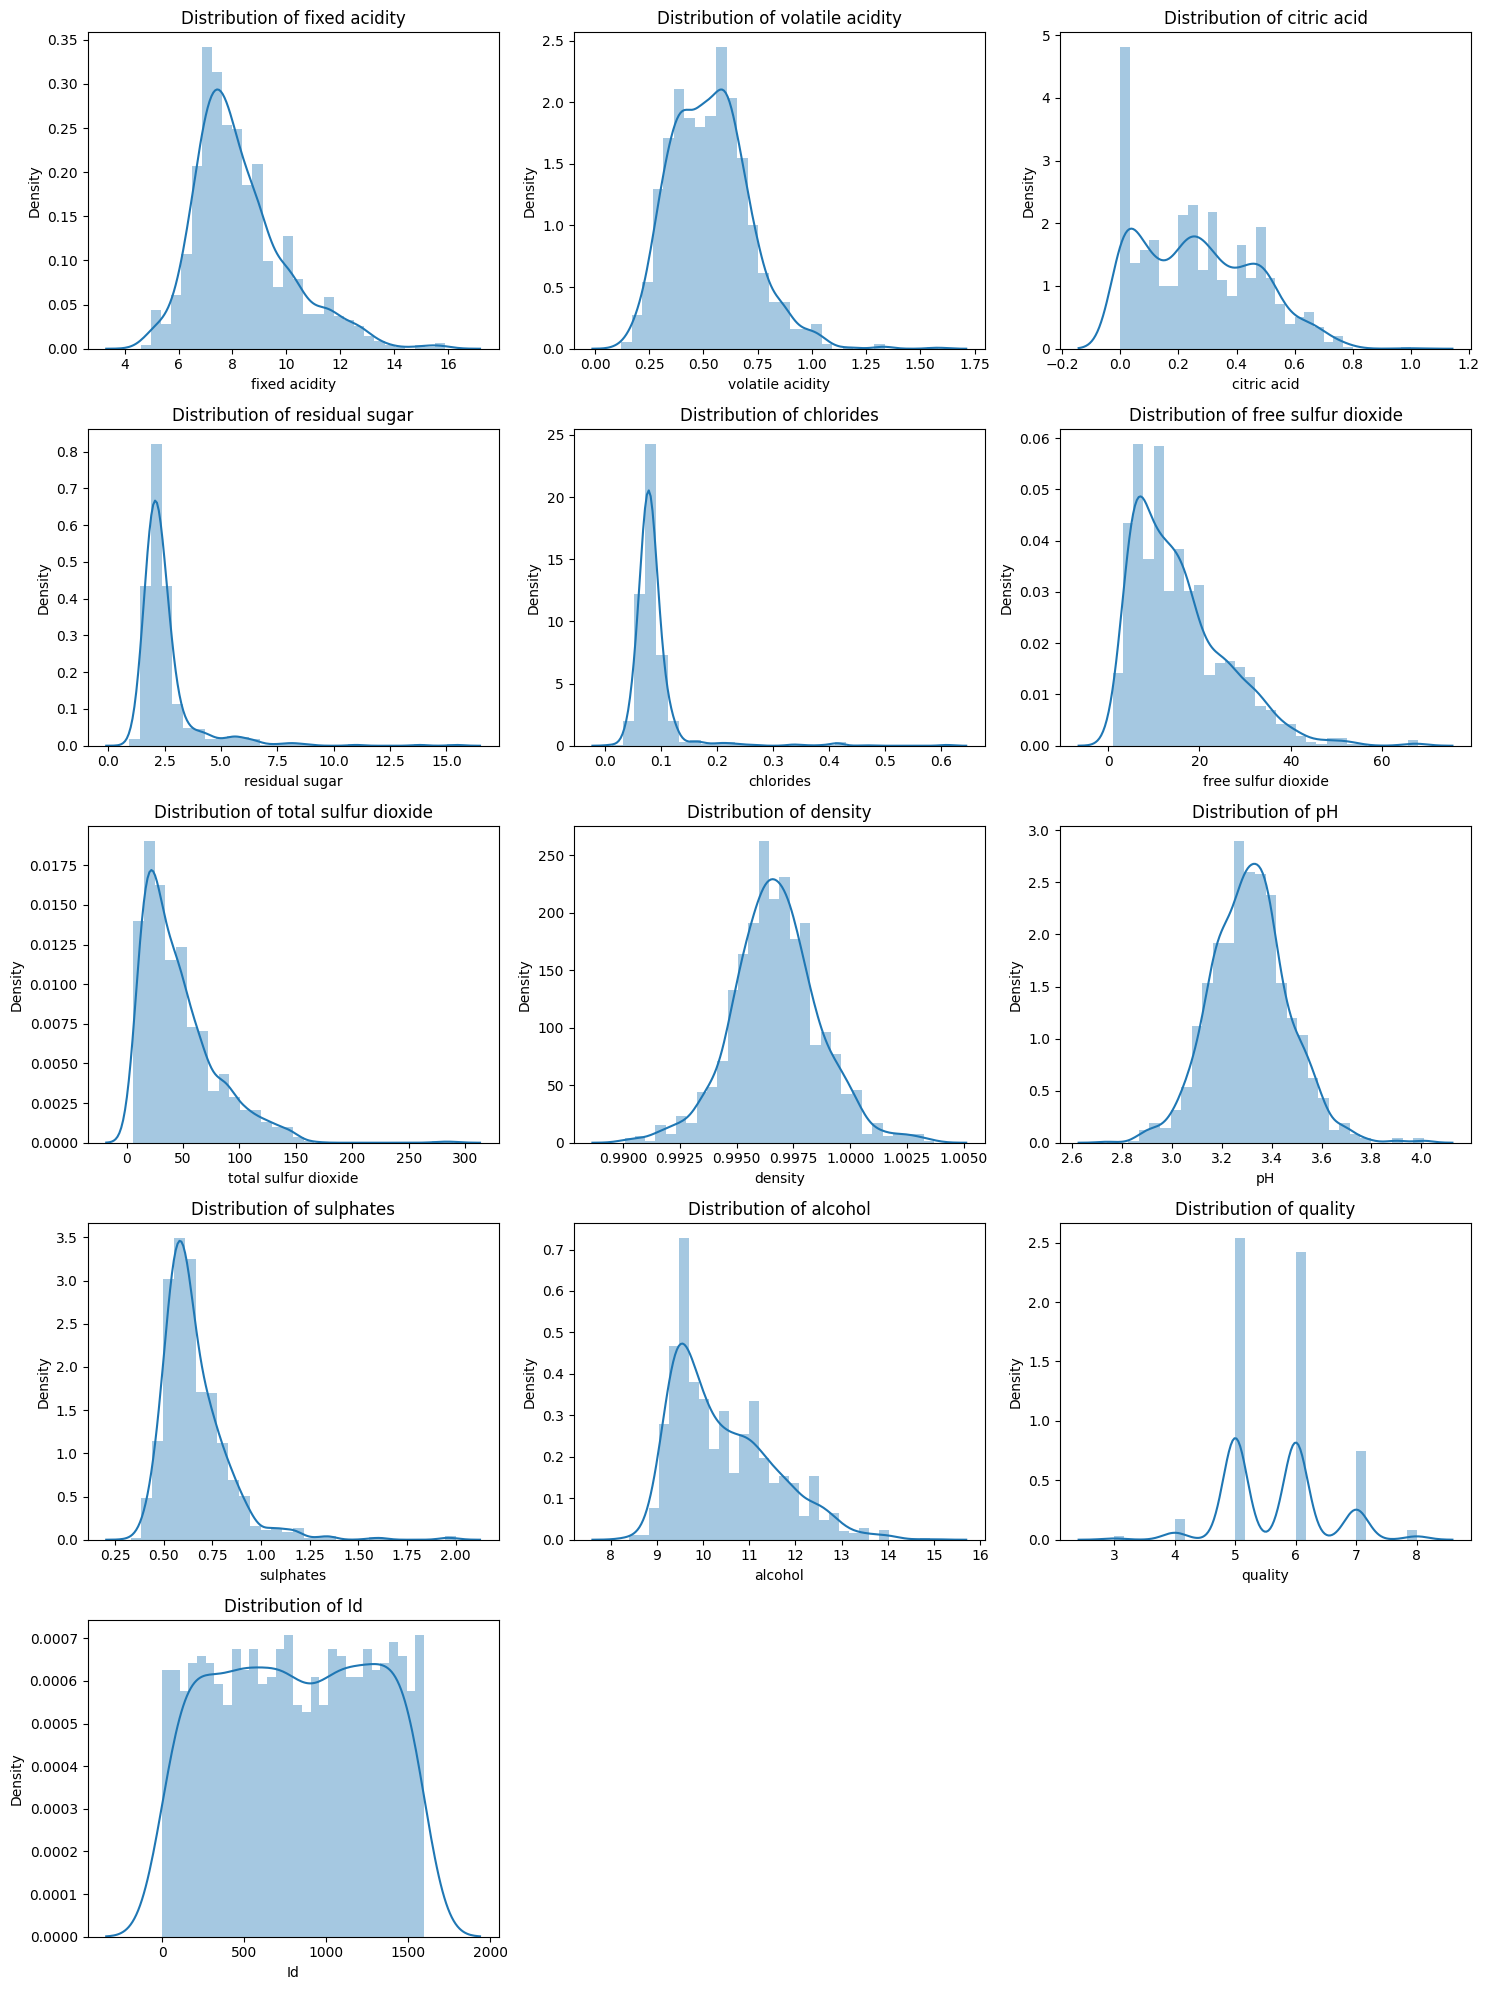

In [12]:
numeric_cols = dataset.select_dtypes(include=np.number).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.distplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [13]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [14]:
dataset['fixed acidity'] = dataset['fixed acidity'].replace(0, dataset['fixed acidity'].mean())
dataset['volatile acidity'] = dataset['volatile acidity'].replace(0, dataset['volatile acidity'].mean())
dataset['citric acid'] = dataset['citric acid'].replace(0, dataset['citric acid'].mean())
dataset['residual sugar'] = dataset['residual sugar'].replace(0, dataset['residual sugar'].median())
dataset['chlorides'] = dataset['chlorides'].replace(0, dataset['chlorides'].median())
dataset['free sulfur dioxide'] = dataset['free sulfur dioxide'].replace(0, dataset['free sulfur dioxide'].median())
dataset['total sulfur dioxide'] = dataset['total sulfur dioxide'].replace(0, dataset['total sulfur dioxide'].median())
dataset['density'] = dataset['density'].replace(0, dataset['density'].mean())
dataset['pH'] = dataset['pH'].replace(0, dataset['pH'].mean())
dataset['sulphates'] = dataset['sulphates'].replace(0, dataset['sulphates'].median())
dataset['alcohol'] = dataset['alcohol'].replace(0, dataset['alcohol'].median())
dataset['quality'] = dataset['quality'].replace(0, dataset['quality'].mean())
dataset['Id'] = dataset['Id'].replace(0, dataset['Id'].mean())



In [15]:
dataset.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,804.969379
1,7.8,0.880,0.268364,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.000000
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.000000
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3.000000
4,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4.000000
5,7.4,0.660,0.268364,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5.000000
6,7.9,0.600,0.060000,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6.000000
7,7.3,0.650,0.268364,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7.000000
8,7.8,0.580,0.020000,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8.000000
9,6.7,0.580,0.080000,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10.000000


Observation--NO 0 value present

**Part2-Outlier Detection and Normalization**

In [16]:
x=dataset.drop(columns='quality',axis=1)
y=dataset['quality']

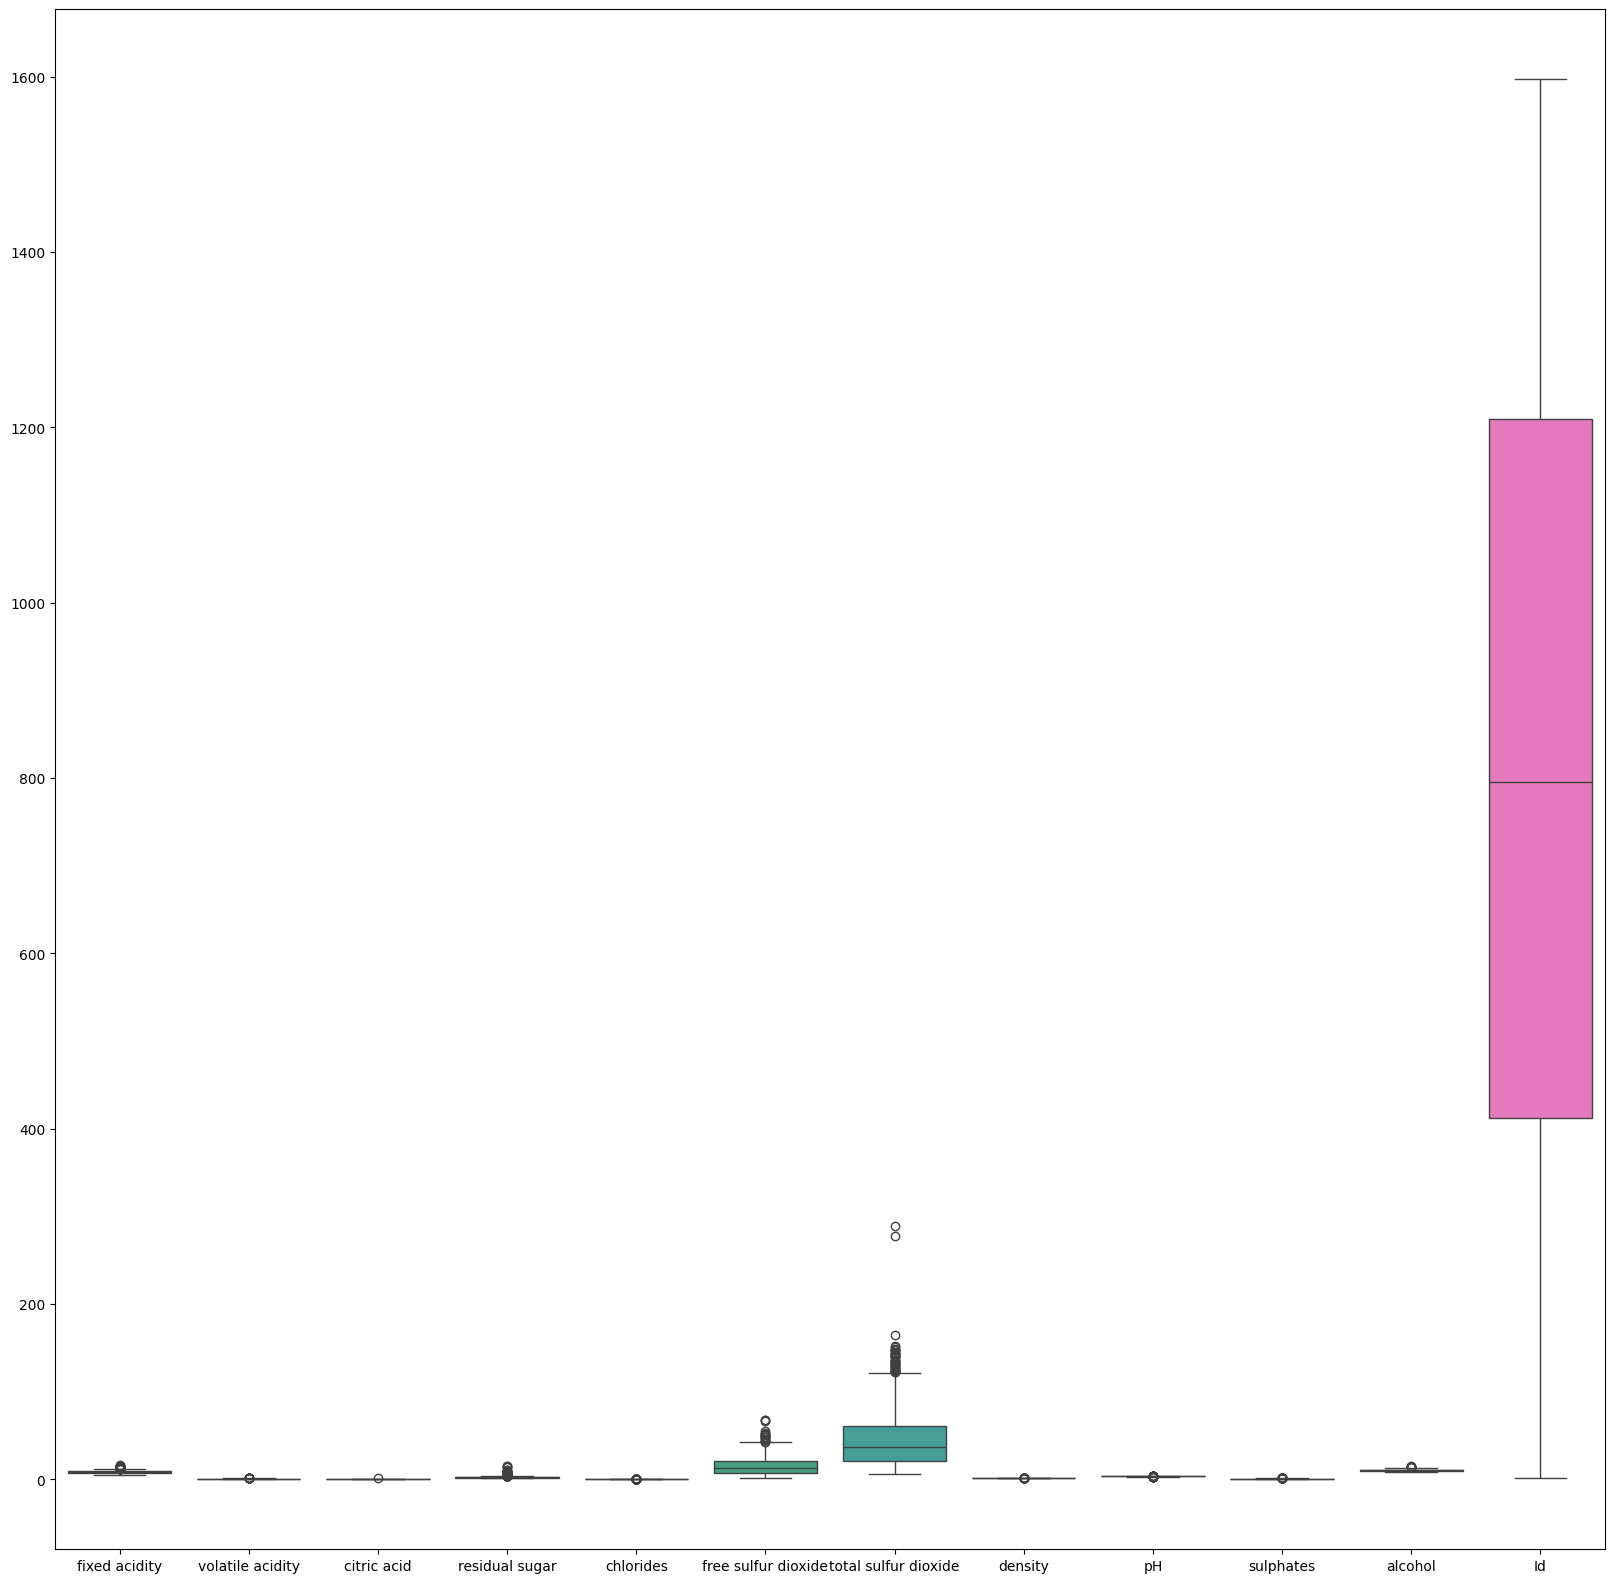

In [17]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplotDT.jpg')


In [18]:
x.shape

(1143, 12)

In [19]:
y.shape

(1143,)

In [20]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [21]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'Id']
for col in cols:
  Q1=x[col].quantile(0.25)#find value for Q1
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound)&(x[col]<=upper_bound)#these lies for true value

In [22]:
x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [23]:
x_outlier_detection.shape

(1143, 12)

In [24]:
y_outlier_detection.shape

(1143,)

# STANDARDIZATION
Standard normal form->> mean=0,standard_deviation=1


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_outlier_detection)

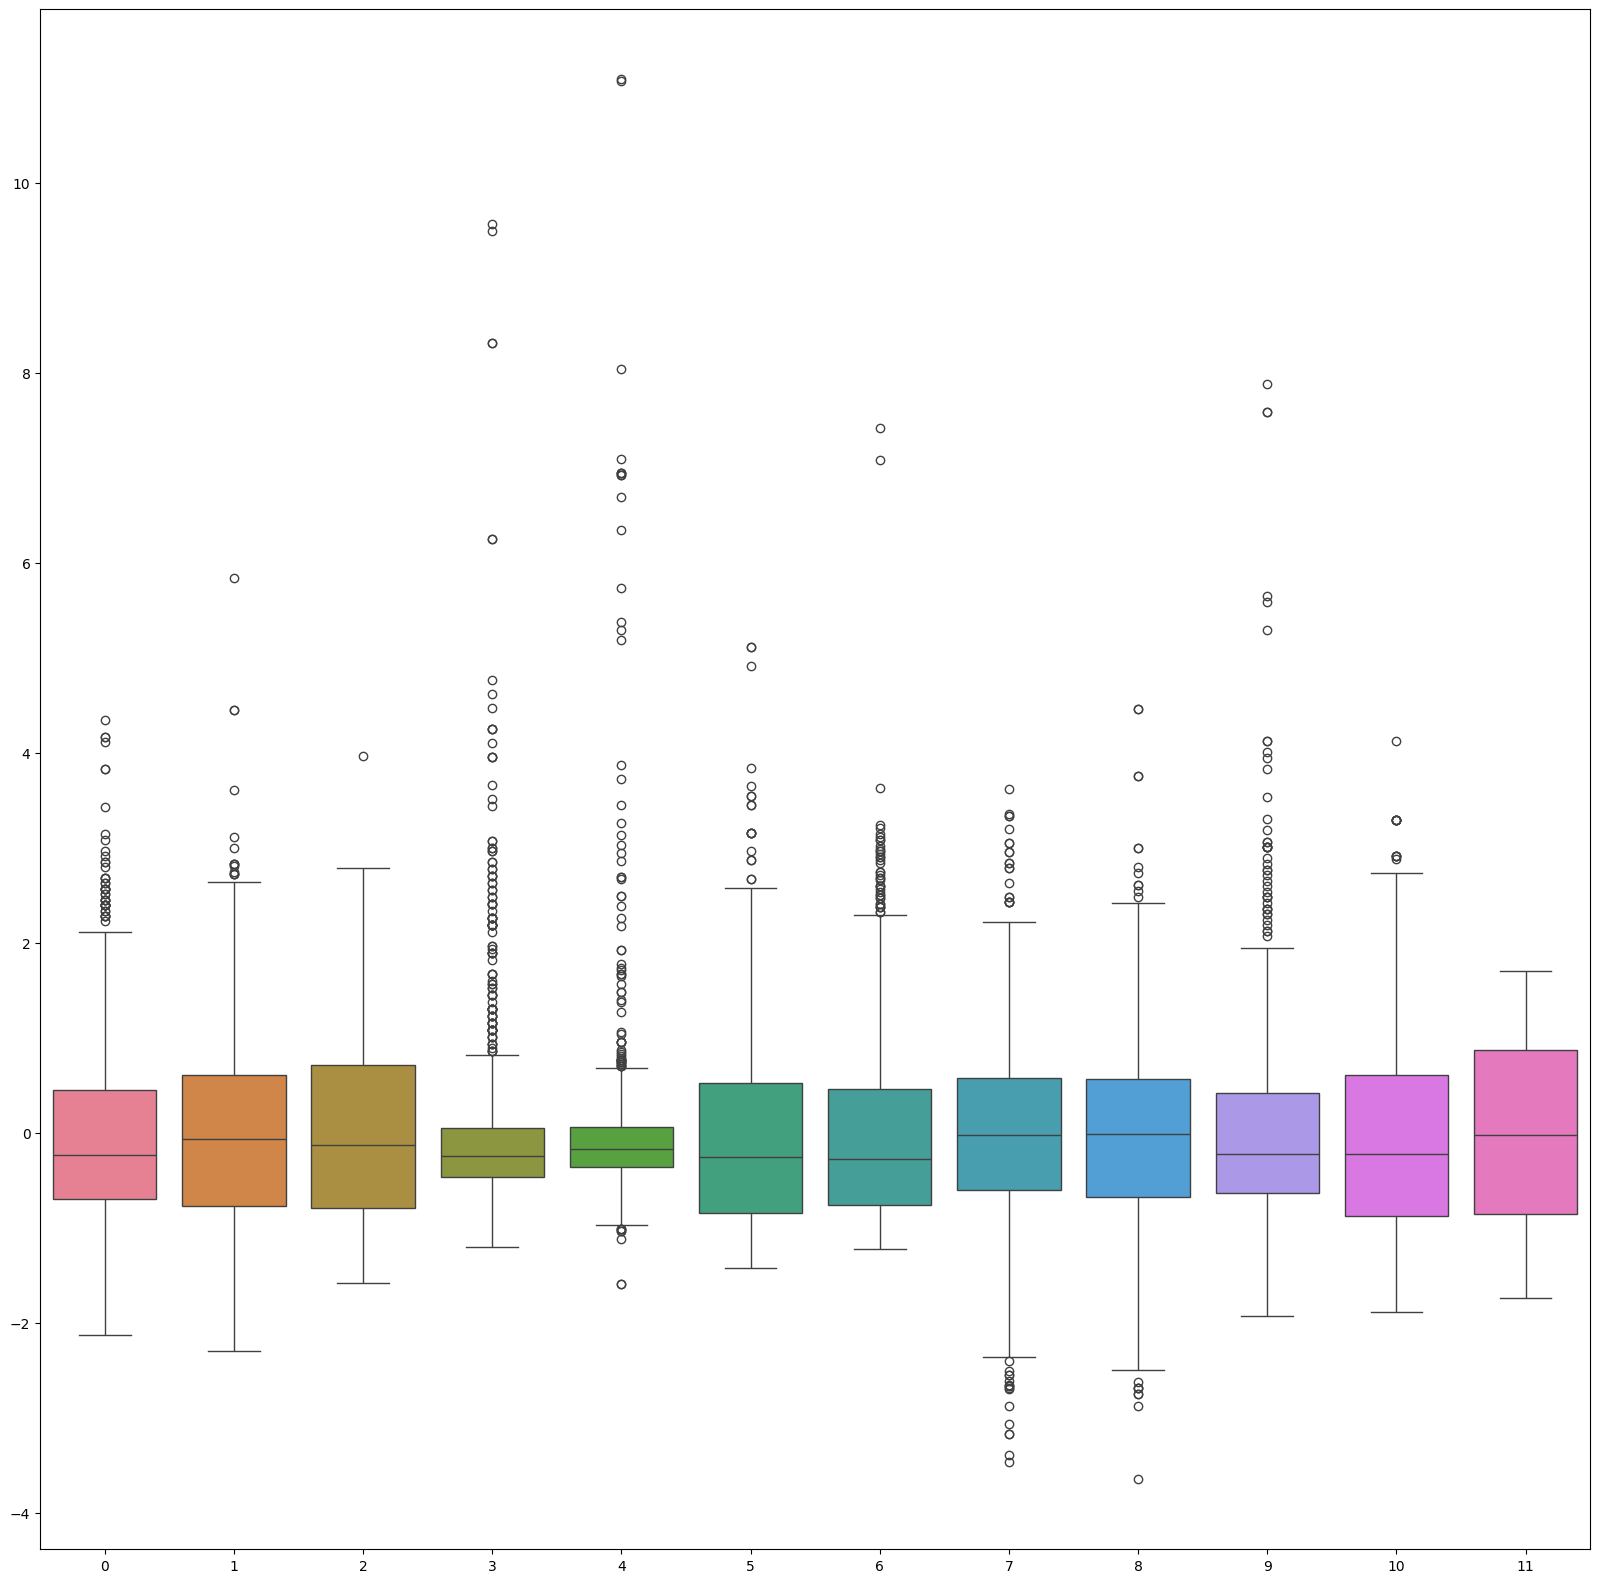

In [26]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [27]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [28]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'Id']

In [29]:
type(x_scaled)

numpy.ndarray

**APPROACH2 of quantiles to remove the outliers**

In [30]:
X = dataset.drop(columns='quality', axis=1)
y = dataset['quality']

In [31]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)#then only column willl be scaled . by default all will be scaled(numbered)
x_scaled.describe()#at first create the dataset and then get the description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1143.000000
mean,-3.729883e-16,4.475860e-16,-8.703061e-17,1.554118e-16,8.081413e-17,-5.594825e-17,9.946355e-17,5.783805e-14,-8.454402e-16,4.973178e-17,-1.193563e-15,0.000000
std,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438
min,-2.124483e+00,-2.290883e+00,-1.577363e+00,-1.204252e+00,-1.585988e+00,-1.426458e+00,-1.218108e+00,-3.461348e+00,-3.646432e+00,-1.924024e+00,-1.887834e+00,-1.737273
25%,-6.933192e-01,-7.732388e-01,-7.931850e-01,-4.664214e-01,-3.583880e-01,-8.408632e-01,-7.603412e-01,-6.030539e-01,-6.769982e-01,-6.323694e-01,-8.709366e-01,-0.848853
50%,-2.353469e-01,-6.314838e-02,-1.301966e-01,-2.450722e-01,-1.678983e-01,-2.552689e-01,-2.720568e-01,-2.619819e-02,-6.480857e-03,-2.213884e-01,-2.238203e-01,-0.023044
75%,4.516116e-01,6.051720e-01,7.191577e-01,5.006018e-02,6.492241e-02,5.255235e-01,4.603699e-01,5.792404e-01,5.682483e-01,4.244390e-01,6.081863e-01,0.871852
max,4.344377e+00,5.840349e+00,3.967894e+00,9.568078e+00,1.109216e+01,5.112679e+00,7.418423e+00,3.616827e+00,4.463634e+00,7.880809e+00,4.121103e+00,1.708457


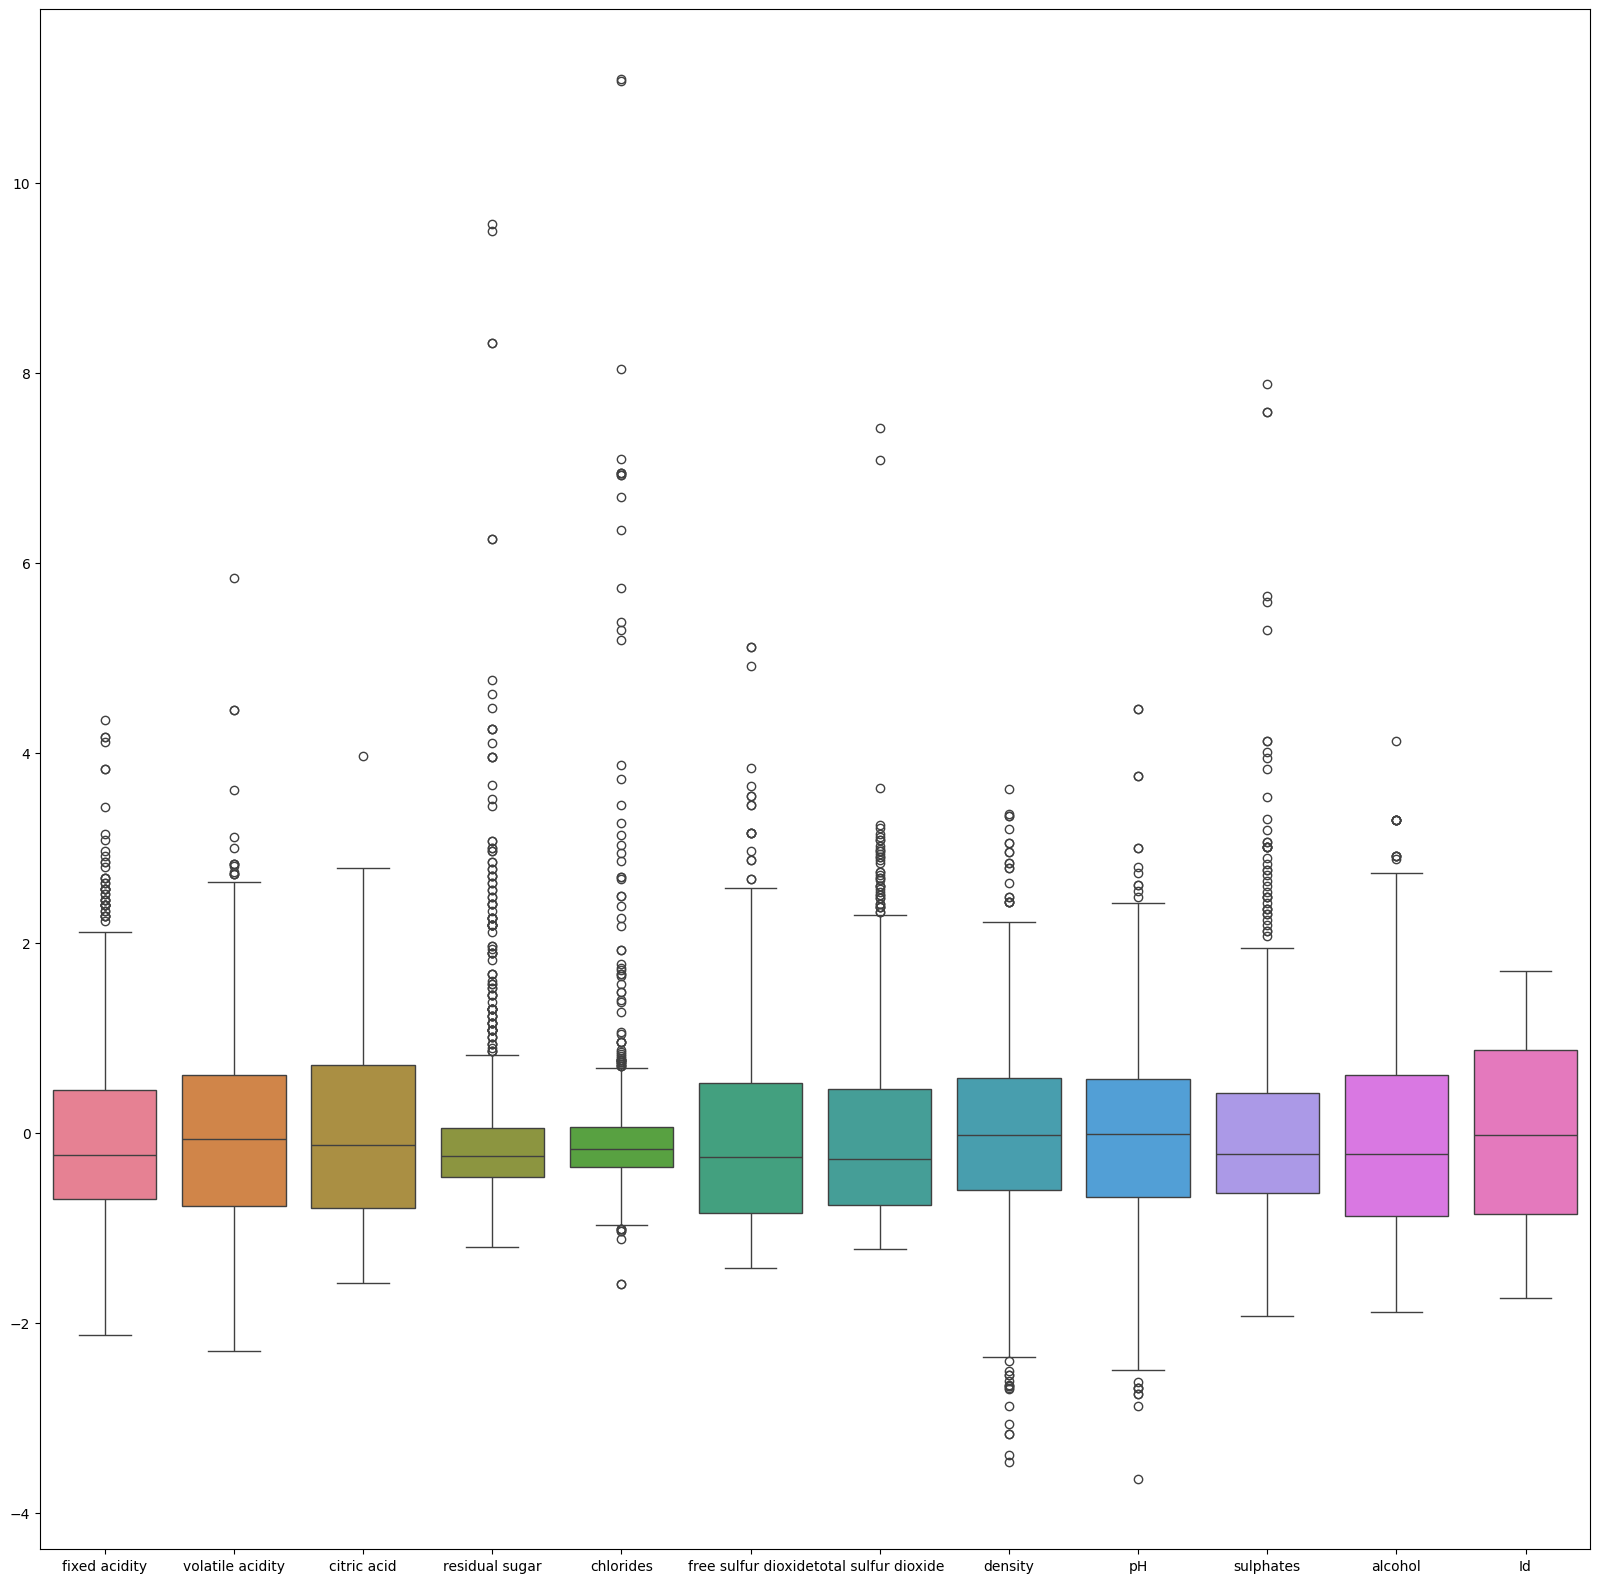

In [32]:

fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [33]:
y.value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [34]:
y_outlier_detection.value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [35]:
q=x_scaled.shape
q

(1143, 12)

In [36]:
x_scaled.reset_index(drop=True,inplace=True)
y_outlier_detection.reset_index(drop=True,inplace=True)

In [37]:
q = x_scaled['chlorides'].quantile(.95)

mask = x_scaled['chlorides'] < q
dataNew = x_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

In [38]:
dataNew.shape

(1082, 12)

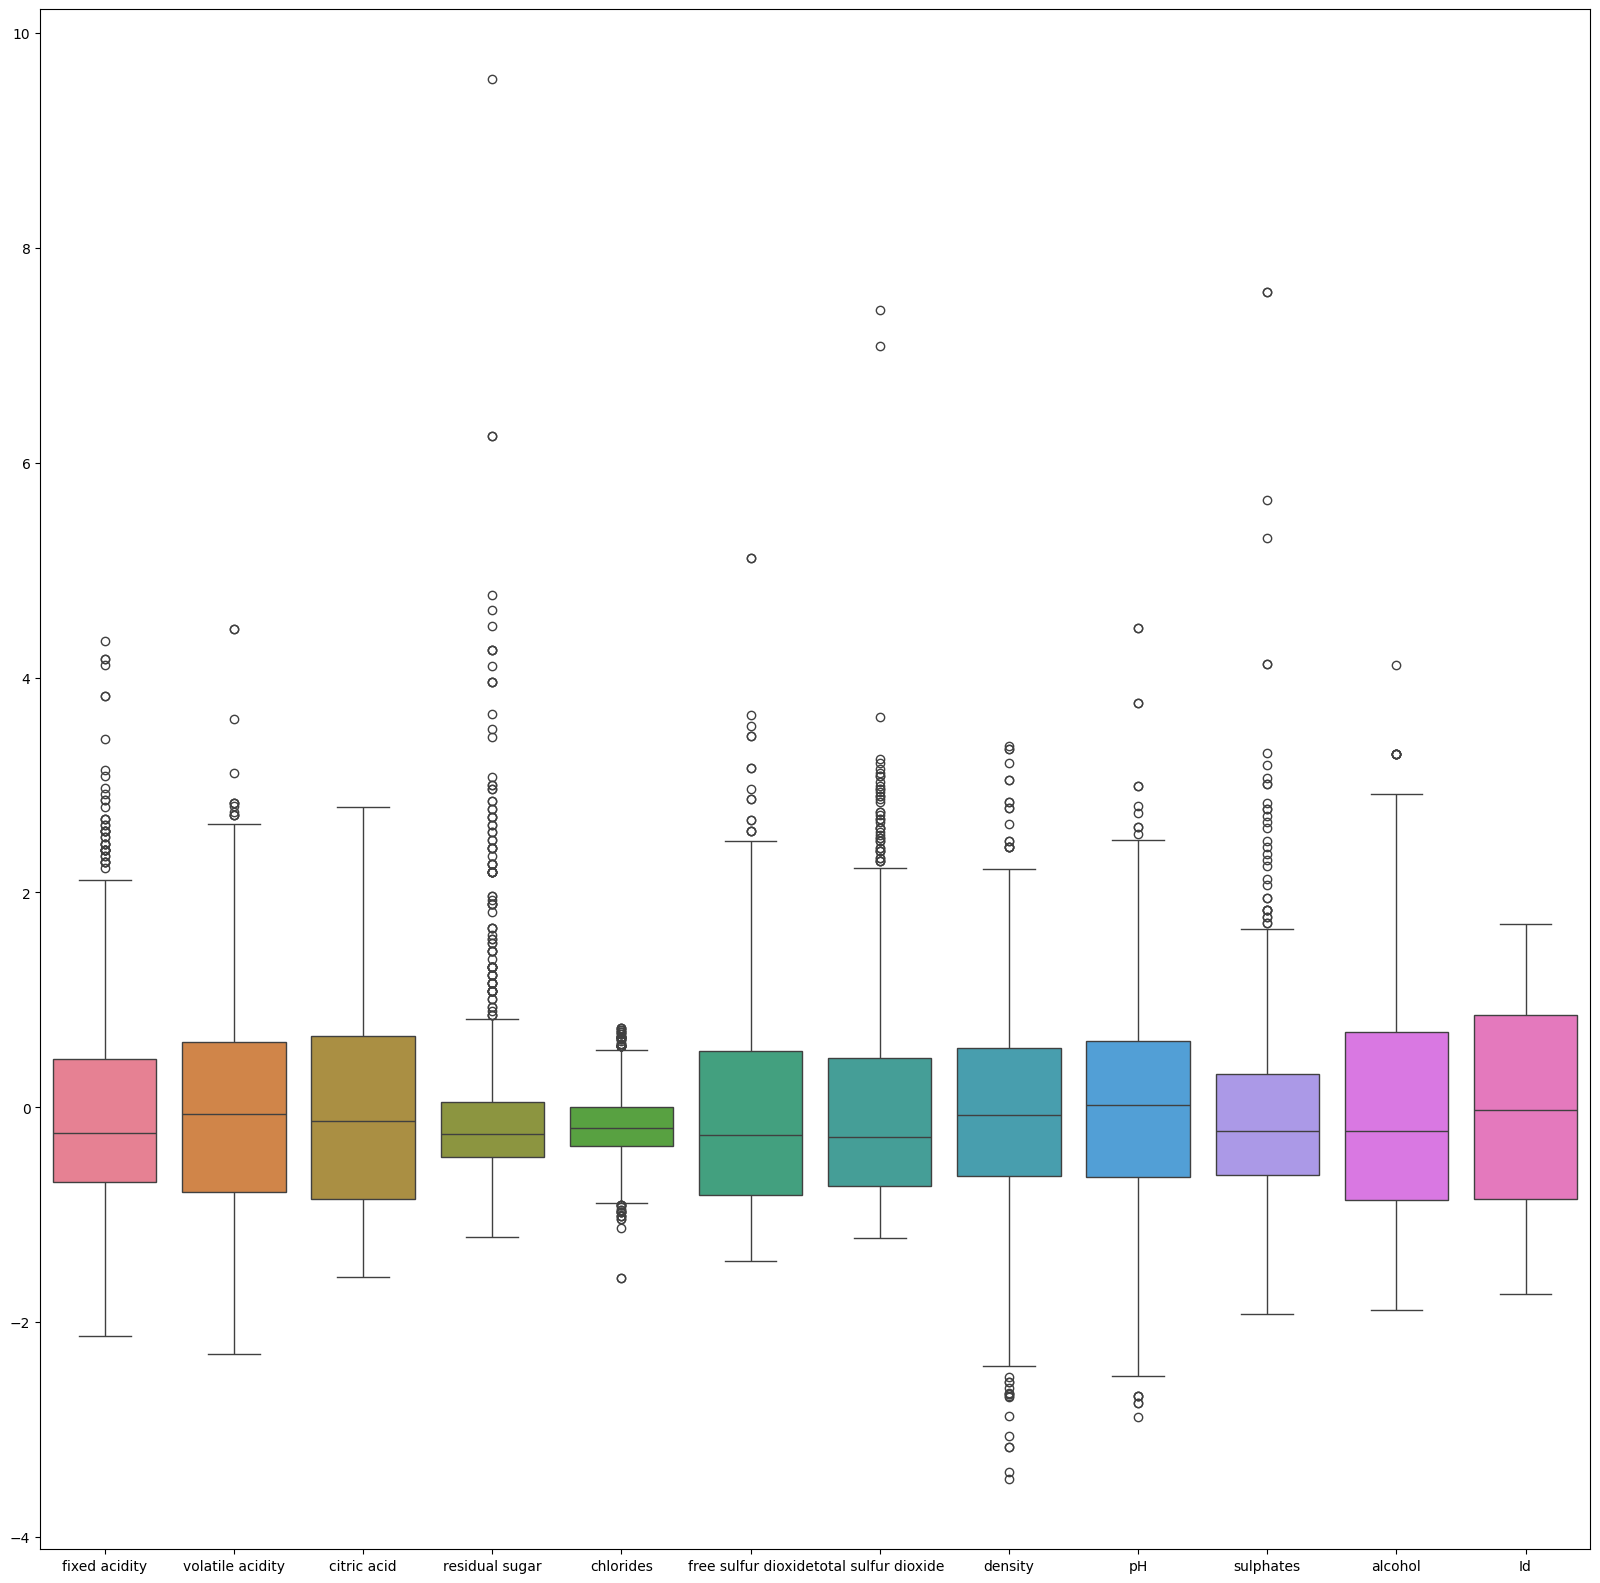

In [39]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=dataNew,ax=ax)
plt.savefig('boxplot.jpg')

Splitting the data into training and testing set

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

#Data Modeling:Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [42]:
y_pred=model.predict(x_test)
print(y_pred)
#making prediction of tets set


[5 5 7 6 5 6 5 6 7 6 5 5 6 6 6 5 5 5 6 5 6 5 6 5 5 6 6 5 6 7 5 5 5 7 7 7 5
 6 5 5 6 6 7 5 6 6 6 6 6 6 7 5 5 7 6 6 5 6 7 5 5 6 6 5 5 5 6 7 6 6 5 5 5 7
 6 6 5 6 6 7 5 5 5 6 7 6 7 5 6 5 8 6 6 5 6 7 7 5 5 6 5 5 5 6 6 6 5 6 6 7 5
 6 5 6 6 5 6 5 5 5 6 5 6 7 6 6 7 6 5 6 4 6 6 5 5 5 6 6 5 6 5 6 5 7 6 5 6 7
 6 5 7 7 6 7 6 5 5 5 6 6 6 5 6 5 5 5 6 6 6 5 5 5 5 6 6 5 5 6 5 5 6 6 6 6 5
 6 6 6 6 5 5 5 6 5 6 6 5 5 6 5 6 5 7 4 7 5 6 5 5 6 5 6 5 6 6 5 5 6 6 6 6 7
 7 6 6 6 6 5 6 6 7 5 5 5 4 7 6 6 5 6 5 6 6 8 7 6 6 6 6 5 6 5 6 4 6 5 6 6 6
 6 6 6 5 6 6 6 6 6 5 6 5 6 5 5 5 7 6 5 6 6 6 7 6 7 6 5]


[Text(0.5231055964052288, 0.96875, 'x[10] <= 10.525\ngini = 0.633\nsamples = 857\nvalue = [4.0, 21.0, 361.0, 358.0, 104.0, 9.0]'),
 Text(0.3109085648148148, 0.90625, 'x[9] <= 0.585\ngini = 0.536\nsamples = 533\nvalue = [3, 13, 312, 184, 19, 2]'),
 Text(0.4170070806100218, 0.9375, 'True  '),
 Text(0.12445533769063181, 0.84375, 'x[10] <= 9.75\ngini = 0.413\nsamples = 247\nvalue = [2, 6, 181, 55, 3, 0]'),
 Text(0.06045751633986928, 0.78125, 'x[8] <= 3.545\ngini = 0.3\nsamples = 144\nvalue = [1, 6, 119, 18, 0, 0]'),
 Text(0.056100217864923745, 0.71875, 'x[4] <= 0.076\ngini = 0.283\nsamples = 142\nvalue = [1, 6, 119, 16, 0, 0]'),
 Text(0.0196078431372549, 0.65625, 'x[2] <= 0.035\ngini = 0.472\nsamples = 39\nvalue = [1, 3, 27, 8, 0, 0]'),
 Text(0.008714596949891068, 0.59375, 'x[3] <= 1.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1, 0, 0]'),
 Text(0.004357298474945534, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.013071895424836602, 0.53125, 'gini = 0.0\nsampl

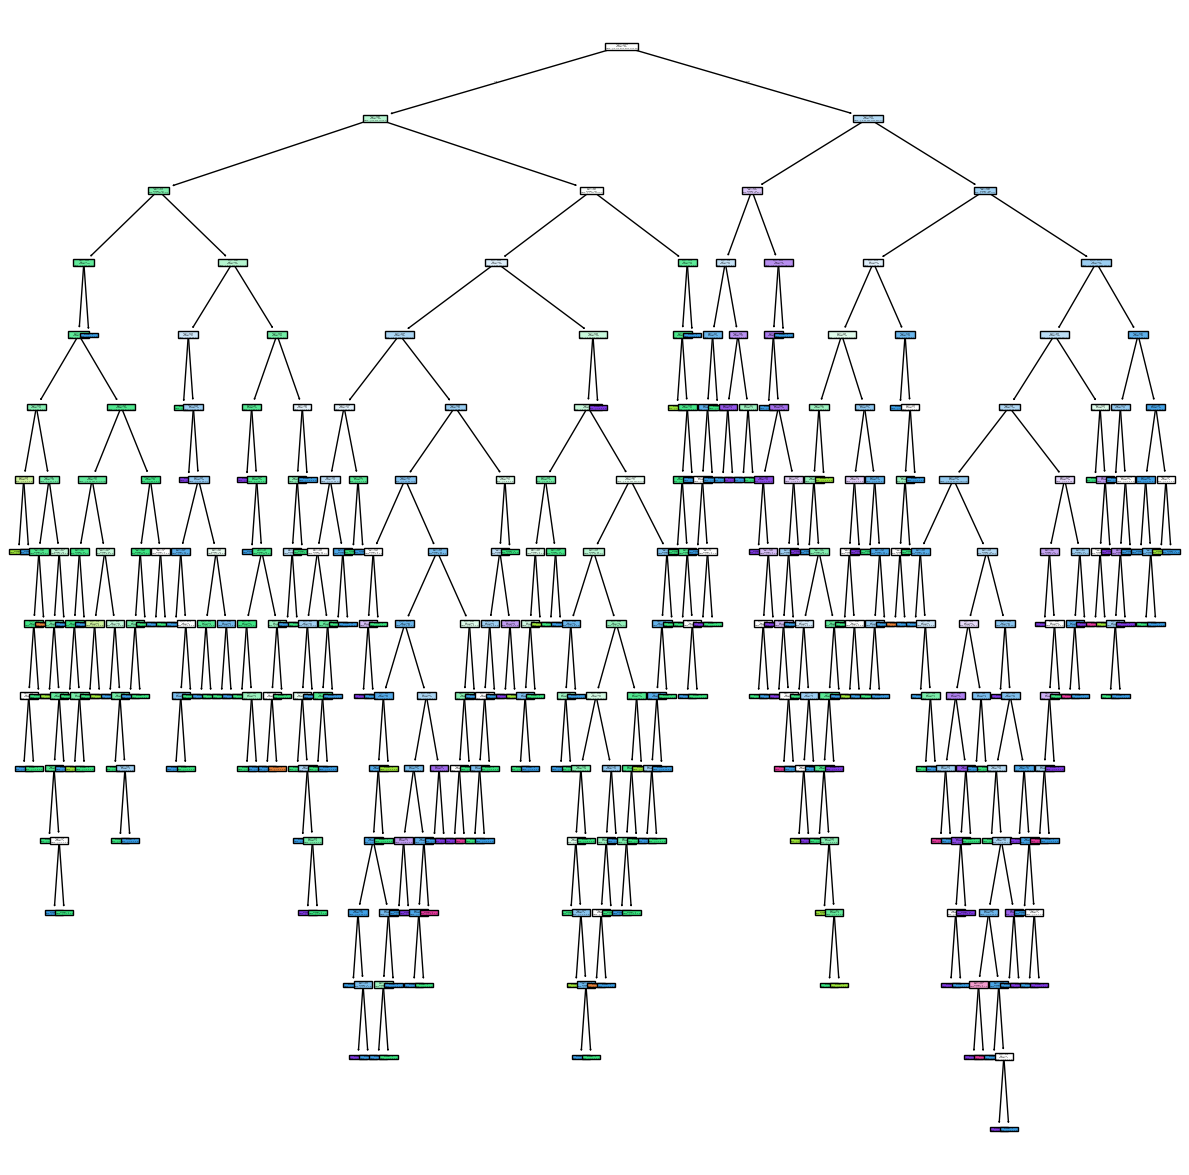

In [43]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)

In [44]:
dataNew.shape

(1082, 12)

In [45]:
sampleData=dataset.head(20)
sampleData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,804.969379
1,7.8,0.880,0.268364,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.000000
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.000000
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3.000000
4,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4.000000
5,7.4,0.660,0.268364,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5.000000
6,7.9,0.600,0.060000,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6.000000
7,7.3,0.650,0.268364,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7.000000
8,7.8,0.580,0.020000,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8.000000
9,6.7,0.580,0.080000,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10.000000


In [46]:
x_sample=sampleData.drop(columns='quality',axis=1)
y_sample=sampleData['quality']
sampleModel=DecisionTreeClassifier()
sampleModel.fit(x_sample,y_sample)

DecisionTreeClassifier()

In [47]:
y_sample.value_counts()

,count
quality,
5,14
6,3
7,3


In [48]:
x_sample.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

[Text(0.5909090909090909, 0.9, 'x[2] <= 0.41\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.36363636363636365, 0.7, 'x[4] <= 0.074\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4772727272727273, 0.8, 'True  '),
 Text(0.18181818181818182, 0.5, 'x[10] <= 9.45\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5454545454545454, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6363636363636364, 0.3, 'x[8] <= 3.315\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7272727272727273, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.7, 'x[10] <= 10.15\ngini = 0.444\nsamples = 3\nvalue = [0

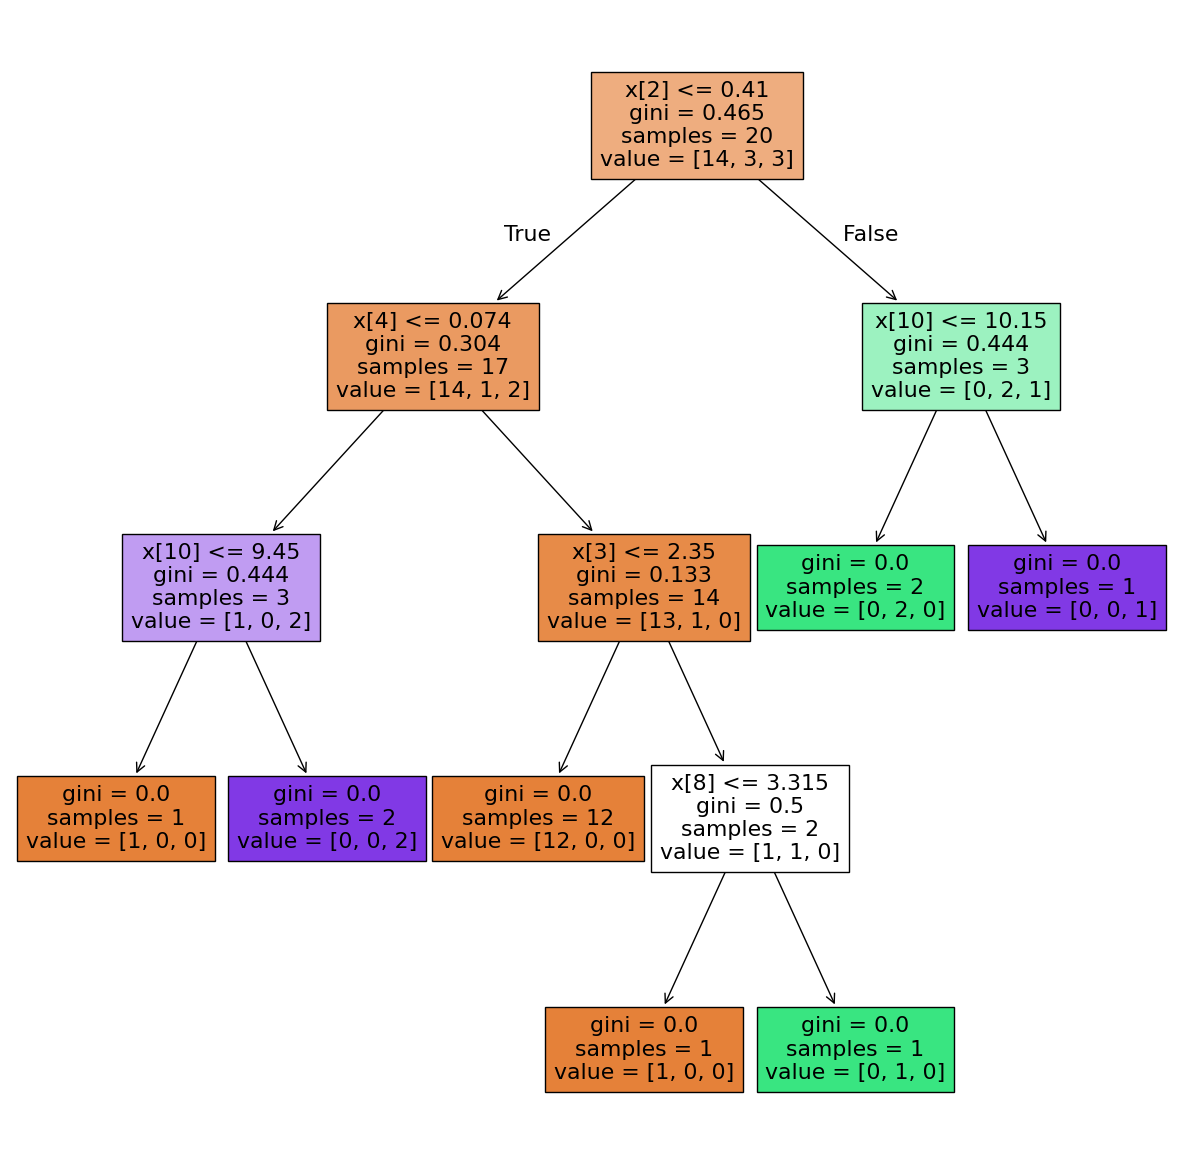

In [49]:
plt.figure(figsize=(15,15))
tree.plot_tree(sampleModel,filled=True)## here we're getting for 5,6,10 because we've taken small range


OBSERVATION- As we're movind down the levels that value of gini will be decreasing and will lead to 0

In [50]:
set(sampleData.quality)

{5, 6, 7}

classification_report-- gives the accuracy,macro avg,weighted average of the dataset

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4
           5       0.59      0.66      0.62       109
           6       0.64      0.49      0.56       136
           7       0.46      0.51      0.49        35
           8       0.00      0.00      0.00         2

    accuracy                           0.55       286
   macro avg       0.28      0.28      0.28       286
weighted avg       0.59      0.55      0.56       286



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=5,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=0)
clf=DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.875\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

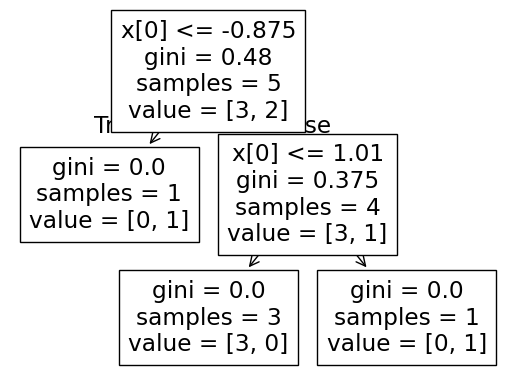

In [53]:
from sklearn.tree import plot_tree

plot_tree(clf)

In [54]:
clf.feature_importances_

array([1., 0.])

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor#these are classifiers under sklearn libraray for decision tree implementation
rf = RandomForestClassifier()
rf.fit(x_train, y_train)#on main dataset and not sampled data

RandomForestClassifier()

In [56]:
#checking score on test data--returns mean accuracy
rf.score(x_test,y_test)#returns the mean accuracy

0.6433566433566433

In [57]:
y_predict_rf=rf.predict(x_test)#prediction of quality of wines we'll be getting
print(y_predict_rf)

[5 5 7 5 5 6 5 6 6 7 5 5 5 6 5 6 5 6 7 5 6 5 6 6 6 6 5 6 6 7 5 5 5 7 7 5 5
 6 5 6 5 6 7 5 6 6 6 6 6 6 6 5 6 6 5 6 5 6 6 5 6 6 6 5 6 5 5 7 6 6 6 5 5 7
 6 6 5 6 6 6 5 5 5 7 7 6 6 5 6 5 7 6 6 5 6 6 7 6 5 6 5 5 5 5 5 5 5 6 6 6 5
 6 6 6 5 5 5 5 5 6 6 5 5 7 6 6 6 6 5 6 5 6 6 5 5 5 6 6 5 6 5 6 5 7 6 5 6 6
 6 6 6 7 5 6 5 5 6 5 5 6 6 5 6 5 5 5 6 6 6 6 5 5 5 5 6 5 6 5 6 5 6 6 6 6 6
 6 6 6 6 5 6 6 6 5 5 6 5 6 5 5 6 5 6 5 5 5 6 6 5 6 5 6 5 6 6 5 5 6 6 6 6 6
 7 5 6 6 6 5 6 6 7 5 6 5 6 7 5 6 5 5 5 6 6 6 6 6 6 6 6 5 6 5 6 5 6 5 5 6 6
 6 6 6 5 6 6 5 6 6 6 6 5 6 6 5 5 7 6 6 6 6 5 6 6 6 6 5]


In [58]:
rf.estimators_#estimators/decisionTree working internally
#list of decision tree estimators

[DecisionTreeClassifier(max_features='sqrt', random_state=1438047093),
 DecisionTreeClassifier(max_features='sqrt', random_state=1241147157),
 DecisionTreeClassifier(max_features='sqrt', random_state=679537532),
 DecisionTreeClassifier(max_features='sqrt', random_state=2081478693),
 DecisionTreeClassifier(max_features='sqrt', random_state=884546116),
 DecisionTreeClassifier(max_features='sqrt', random_state=196693665),
 DecisionTreeClassifier(max_features='sqrt', random_state=1563840669),
 DecisionTreeClassifier(max_features='sqrt', random_state=1481336824),
 DecisionTreeClassifier(max_features='sqrt', random_state=434971649),
 DecisionTreeClassifier(max_features='sqrt', random_state=1226524628),
 DecisionTreeClassifier(max_features='sqrt', random_state=1748032995),
 DecisionTreeClassifier(max_features='sqrt', random_state=1620182741),
 DecisionTreeClassifier(max_features='sqrt', random_state=1428338213),
 DecisionTreeClassifier(max_features='sqrt', random_state=1947649869),
 DecisionT

[Text(0.43392857142857144, 0.96875, 'x[9] <= 0.585\ngini = 0.631\nsamples = 555\nvalue = [3, 19, 370, 351, 101, 13]'),
 Text(0.1172748447204969, 0.90625, 'x[4] <= 0.069\ngini = 0.491\nsamples = 202\nvalue = [3.0, 11.0, 200.0, 77.0, 10.0, 0.0]'),
 Text(0.27560170807453416, 0.9375, 'True  '),
 Text(0.01987577639751553, 0.84375, 'x[9] <= 0.435\ngini = 0.683\nsamples = 43\nvalue = [2, 4, 23, 23, 8, 0]'),
 Text(0.009937888198757764, 0.78125, 'x[7] <= 0.993\ngini = 0.48\nsamples = 3\nvalue = [0, 2, 0, 0, 3, 0]'),
 Text(0.004968944099378882, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 3, 0]'),
 Text(0.014906832298136646, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.02981366459627329, 0.78125, 'x[0] <= 6.25\ngini = 0.639\nsamples = 40\nvalue = [2, 2, 23, 23, 5, 0]'),
 Text(0.024844720496894408, 0.71875, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 8, 0, 0, 0]'),
 Text(0.034782608695652174, 0.71875, 'x[9] <= 0.49\ngini = 0.644\nsamples = 34\nvalue = [2, 2, 15

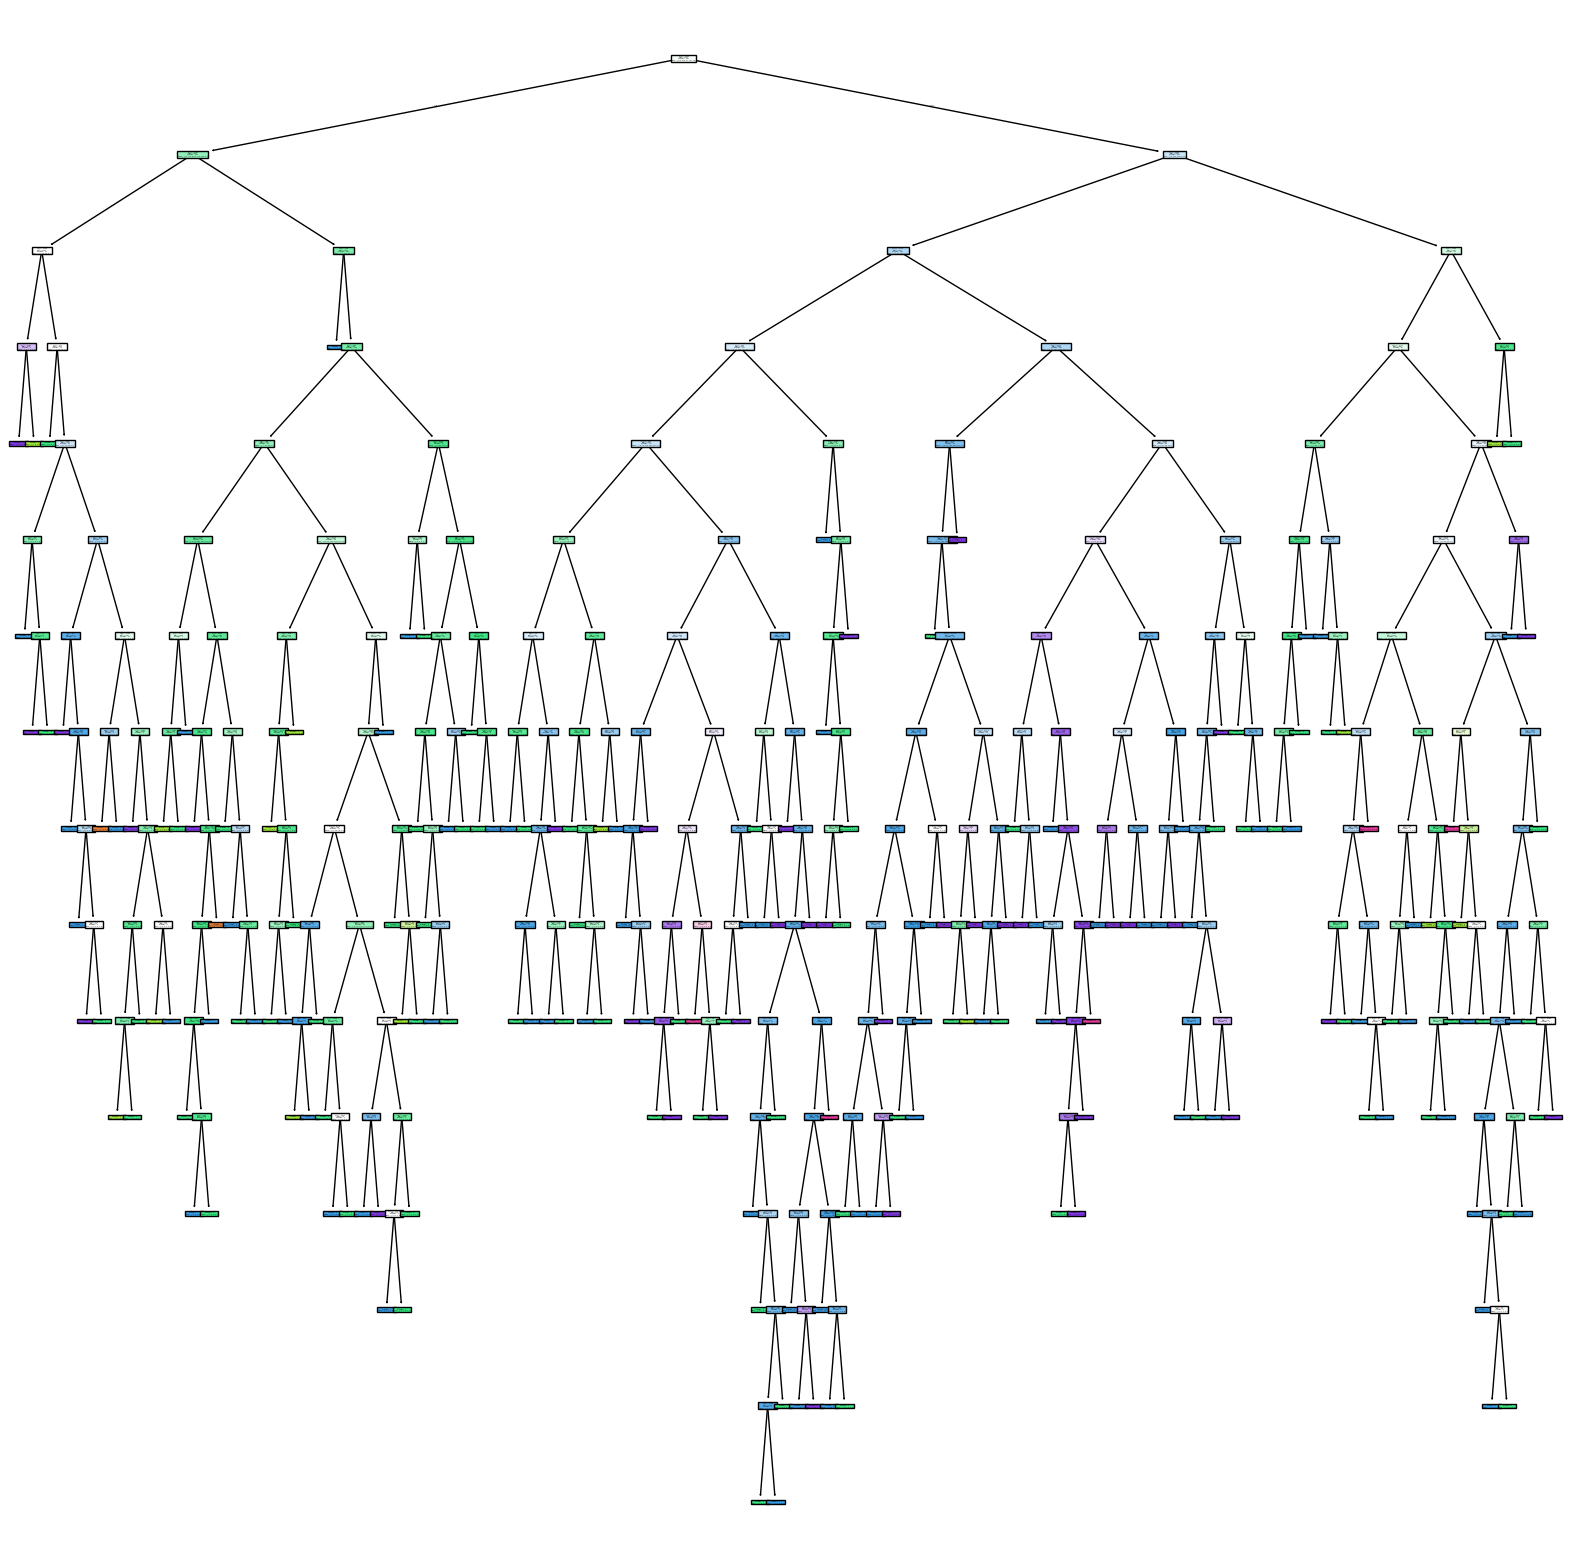

In [59]:
plt.figure(figsize= (20,20))
tree.plot_tree(rf.estimators_[0],filled=True)#all nodes contains information.
#one can clearly check it by increasing range.

In [60]:
lst = [DecisionTreeClassifier(max_features='sqrt', random_state=1207221650),
 DecisionTreeClassifier(max_features='sqrt', random_state=271498305),
 DecisionTreeClassifier(max_features='sqrt', random_state=1520572380),
 DecisionTreeClassifier(max_features='sqrt', random_state=1084035594),
 DecisionTreeClassifier(max_features='sqrt', random_state=1600634660),
 DecisionTreeClassifier(max_features='sqrt', random_state=1771429680),
 DecisionTreeClassifier(max_features='sqrt', random_state=1616302164),
 DecisionTreeClassifier(max_features='sqrt', random_state=210688443),
 DecisionTreeClassifier(max_features='sqrt', random_state=211285308),
 DecisionTreeClassifier(max_features='sqrt', random_state=369716156),
 DecisionTreeClassifier(max_features='sqrt', random_state=1448064097),
 DecisionTreeClassifier(max_features='sqrt', random_state=1751221911),
 DecisionTreeClassifier(max_features='sqrt', random_state=2065746137),
 DecisionTreeClassifier(max_features='sqrt', random_state=1661677090),
 DecisionTreeClassifier(max_features='sqrt', random_state=1204059923),
 DecisionTreeClassifier(max_features='sqrt', random_state=243791502),
 DecisionTreeClassifier(max_features='sqrt', random_state=1524266902),
 DecisionTreeClassifier(max_features='sqrt', random_state=883654068),
 DecisionTreeClassifier(max_features='sqrt', random_state=576919577),
 DecisionTreeClassifier(max_features='sqrt', random_state=1013041113),
 DecisionTreeClassifier(max_features='sqrt', random_state=1011446518),
 DecisionTreeClassifier(max_features='sqrt', random_state=2105498496),
 DecisionTreeClassifier(max_features='sqrt', random_state=1867116866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1765774877),
 DecisionTreeClassifier(max_features='sqrt', random_state=332723627),
 DecisionTreeClassifier(max_features='sqrt', random_state=2122328370),
 DecisionTreeClassifier(max_features='sqrt', random_state=497780875),
 DecisionTreeClassifier(max_features='sqrt', random_state=1055811522),
 DecisionTreeClassifier(max_features='sqrt', random_state=973649372),
 DecisionTreeClassifier(max_features='sqrt', random_state=1698401594),
 DecisionTreeClassifier(max_features='sqrt', random_state=370916769),
 DecisionTreeClassifier(max_features='sqrt', random_state=173983428),
 DecisionTreeClassifier(max_features='sqrt', random_state=1541050848),
 DecisionTreeClassifier(max_features='sqrt', random_state=1981734719),
 DecisionTreeClassifier(max_features='sqrt', random_state=1289180502),
 DecisionTreeClassifier(max_features='sqrt', random_state=1417764894),
 DecisionTreeClassifier(max_features='sqrt', random_state=1958054169),
 DecisionTreeClassifier(max_features='sqrt', random_state=266371829),
 DecisionTreeClassifier(max_features='sqrt', random_state=583880494),
 DecisionTreeClassifier(max_features='sqrt', random_state=694053796),
 DecisionTreeClassifier(max_features='sqrt', random_state=508394461),
 DecisionTreeClassifier(max_features='sqrt', random_state=1350988980),
 DecisionTreeClassifier(max_features='sqrt', random_state=2013731033),
 DecisionTreeClassifier(max_features='sqrt', random_state=978876927),
 DecisionTreeClassifier(max_features='sqrt', random_state=1620292421),
 DecisionTreeClassifier(max_features='sqrt', random_state=1595105460),
 DecisionTreeClassifier(max_features='sqrt', random_state=995615733),
 DecisionTreeClassifier(max_features='sqrt', random_state=833740744),
 DecisionTreeClassifier(max_features='sqrt', random_state=2132716536),
 DecisionTreeClassifier(max_features='sqrt', random_state=1696784032),
 DecisionTreeClassifier(max_features='sqrt', random_state=816488511),
 DecisionTreeClassifier(max_features='sqrt', random_state=238796200),
 DecisionTreeClassifier(max_features='sqrt', random_state=1945040390),
 DecisionTreeClassifier(max_features='sqrt', random_state=267920396),
 DecisionTreeClassifier(max_features='sqrt', random_state=1375254394),
 DecisionTreeClassifier(max_features='sqrt', random_state=338884359),
 DecisionTreeClassifier(max_features='sqrt', random_state=496445008),
 DecisionTreeClassifier(max_features='sqrt', random_state=17083671),
 DecisionTreeClassifier(max_features='sqrt', random_state=117854860),
 DecisionTreeClassifier(max_features='sqrt', random_state=1628821326),
 DecisionTreeClassifier(max_features='sqrt', random_state=1083921928),
 DecisionTreeClassifier(max_features='sqrt', random_state=819447854),
 DecisionTreeClassifier(max_features='sqrt', random_state=967831533),
 DecisionTreeClassifier(max_features='sqrt', random_state=1148838646),
 DecisionTreeClassifier(max_features='sqrt', random_state=248104915),
 DecisionTreeClassifier(max_features='sqrt', random_state=330080872),
 DecisionTreeClassifier(max_features='sqrt', random_state=2087654822),
 DecisionTreeClassifier(max_features='sqrt', random_state=1043560881),
 DecisionTreeClassifier(max_features='sqrt', random_state=1497404603),
 DecisionTreeClassifier(max_features='sqrt', random_state=1628300778),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416264479),
 DecisionTreeClassifier(max_features='sqrt', random_state=1651230503),
 DecisionTreeClassifier(max_features='sqrt', random_state=213211602),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491716064),
 DecisionTreeClassifier(max_features='sqrt', random_state=1416735533),
 DecisionTreeClassifier(max_features='sqrt', random_state=352142613),
 DecisionTreeClassifier(max_features='sqrt', random_state=332246973),
 DecisionTreeClassifier(max_features='sqrt', random_state=2064188223),
 DecisionTreeClassifier(max_features='sqrt', random_state=1720959578),
 DecisionTreeClassifier(max_features='sqrt', random_state=938319536),
 DecisionTreeClassifier(max_features='sqrt', random_state=1216677341),
 DecisionTreeClassifier(max_features='sqrt', random_state=1020211174),
 DecisionTreeClassifier(max_features='sqrt', random_state=941561685),
 DecisionTreeClassifier(max_features='sqrt', random_state=1455116870),
 DecisionTreeClassifier(max_features='sqrt', random_state=48899324),
 DecisionTreeClassifier(max_features='sqrt', random_state=564214121),
 DecisionTreeClassifier(max_features='sqrt', random_state=978576042),
 DecisionTreeClassifier(max_features='sqrt', random_state=1496416686),
 DecisionTreeClassifier(max_features='sqrt', random_state=780965169),
 DecisionTreeClassifier(max_features='sqrt', random_state=134743595),
 DecisionTreeClassifier(max_features='sqrt', random_state=1828665050),
 DecisionTreeClassifier(max_features='sqrt', random_state=489082406),
 DecisionTreeClassifier(max_features='sqrt', random_state=639051190),
 DecisionTreeClassifier(max_features='sqrt', random_state=560204224),
 DecisionTreeClassifier(max_features='sqrt', random_state=121450284),
 DecisionTreeClassifier(max_features='sqrt', random_state=1990872082),
 DecisionTreeClassifier(max_features='sqrt', random_state=1921873150),
 DecisionTreeClassifier(max_features='sqrt', random_state=474293923),
 DecisionTreeClassifier(max_features='sqrt', random_state=1414423120),
 DecisionTreeClassifier(max_features='sqrt', random_state=912234182)]

In [61]:
#by default, the values of the estimator is 100, so here we're verifying it
print(len(lst))

100


#Hyperparameter Tuning:
METHOD1--GridSearchCV
METHOD2--RandomSearchCV

**GridSearchCV**

In [62]:
grid_param={
    "n_estimators":[5,10,50],
    "criterion":['gini','entropy'],
    "max_depth":range(5),
    'min_samples_leaf':range(5)
}
#try to explore all options provided and provide the best one

In [63]:
from sklearn.model_selection import GridSearchCV
grid_search_rf=GridSearchCV(param_grid=grid_param,cv=10,n_jobs=6,verbose=1,estimator=rf)
grid_search_rf.fit(x_train,y_train)#cv=cross validation(used to tune the hyper parameter)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'min_samples_leaf': range(0, 5),
                         'n_estimators': [5, 10, 50]},
             verbose=1)

In [64]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'n_estimators': 50}

In [65]:
rf_new=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth= 9,min_samples_leaf= 1)

In [66]:
rf_new.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50)

In [67]:
rf_new.score(x_test,y_test)

0.6188811188811189

Initially the mean accuracy(rf_score)  got was 0.6643356643356644
and now it has improved to 0.6748251748251748.
On incraesing the parameter values and the range the accuracy will incrase based on all random search spaces.
Observation: By default the criteria for impurity is fini index but in our random search it predicted it to be entropy

**RandomisedSearchCV**

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
model=RandomForestClassifier(random_state=42)

In [70]:
rand_search={
    "n_estimators":[5,10,50],
    "criterion":['gini','entropy'],
    "max_depth":range(5),
    'min_samples_leaf':range(5)
}

In [71]:
random_search_rf=RandomizedSearchCV(param_distributions=rand_search,cv=10,n_jobs=6,verbose=1,estimator=rf)
random_search_rf.fit(x_train,y_train)#cv=cross validation(used to tune the hyper parameter)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 5),
                                        'min_samples_leaf': range(0, 5),
                                        'n_estimators': [5, 10, 50]},
                   verbose=1)

In [72]:
random_search_rf.best_params_

{'n_estimators': 50,
 'min_samples_leaf': 4,
 'max_depth': 2,
 'criterion': 'gini'}

In [73]:
rf_new=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth= 4,min_samples_leaf= 3)

In [74]:
rf_new.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, n_estimators=10)

In [75]:
rf_new.score(x_test,y_test)

0.5874125874125874

**Observation**: Initially, the mean accuracy (rf_score) obtained was 0.6643, which improved to 0.6748 after applying RandomizedSearchCV for hyperparameter tuning. This shows that expanding the parameter range helped the model perform better by exploring more combinations in the search space.

Although the default criterion for measuring impurity in Random Forest is Gini index, the RandomizedSearchCV selected entropy as the best option during tuning. However, the mean cross-validation score from RandomizedSearchCV was 0.6224, which is lower than the validation accuracy-suggesting a possible variance in model generalization or mild overfitting.

**The hyper parameter tuning is not limited for only Random Forest we can sue it in  other ML techniques**.